# Plot individual solar data file

Plot the irradiance across all of Aus from a single time slice

In [1]:
from netCDF4 import Dataset
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os

### Single time slice

2019/06/05/


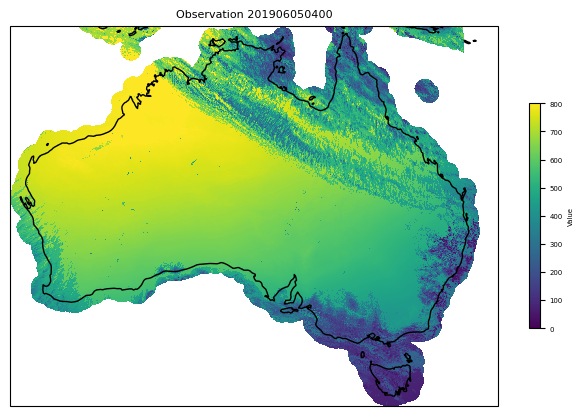

In [6]:
# read in the data
# Using 10 min temporal resolution data 

# datetime information needed for file name AND file path
# files are organised in directories based on AUS date, but files are named using UTC
year = '2019'
month = '06'
day = '05'
utc = '0400'
datein=year+month+day+utc
maxv=800
filename='IDE00326.'+datein+'.nc'
print(datein[0:4]+'/'+datein[4:6]+'/'+datein[6:8]+'/')


dirin='/g/data/rv74/satellite-products/arc/der/himawari-ahi/solar/p1s/latest/'+datein[0:4]+'/'+datein[4:6]+'/'+datein[6:8]+'/'

dataset = Dataset(dirin+filename)

# Read the variables
latitudes = dataset.variables['latitude'][:]
longitudes = dataset.variables['longitude'][:]
irradiance = np.squeeze(dataset.variables['surface_global_irradiance'][:,:,:])

# Create a figure
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

mesh=ax.pcolormesh(longitudes, latitudes, irradiance, cmap='viridis',vmin=0, \
                        vmax=maxv, transform=ccrs.PlateCarree())

ax.set_title('Observation '+datein,fontsize=8)
ax.coastlines()
cbar = plt.colorbar(mesh,ax=ax,shrink=0.5)
cbar.ax.tick_params(labelsize=5)  # Set the font size for the colorbar ticks
cbar.set_label('Value', fontsize=5) 
 
plt.tight_layout()

plt.show()

In [11]:
dataset.variables

{'time': <class 'netCDF4._netCDF4.Variable'>
 int32 time(time)
     long_name: time
     calendar: gregorian
     units: seconds since 2000-01-01 00:00:00 UTC
     comment: Start time of the corresponding satellite observation period
 unlimited dimensions: 
 current shape = (1,)
 filling on, default _FillValue of -2147483647 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(latitude)
     standard_name: latitude
     long_name: latitude
     units: degrees_north
     comment: latitude at the centre of the pixel
 unlimited dimensions: 
 current shape = (1726,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'longitude': <class 'netCDF4._netCDF4.Variable'>
 float32 longitude(longitude)
     standard_name: longitude
     long_name: longitude
     units: degrees_east
     comment: longitude at the centre of the pixel
 unlimited dimensions: 
 current shape = (2214,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'crs': <class 'netCDF4.

2019/06/05/


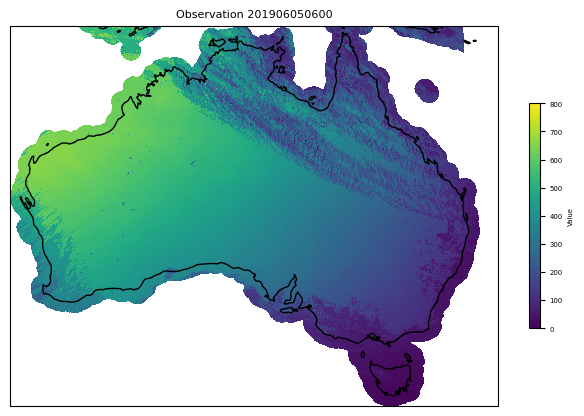

In [3]:
# read in the data
# Using 10 min temporal resolution data 

# datetime information needed for file name AND file path
# files are organised in directories based on AUS date, but files are named using UTC
year = '2019'
month = '06'
day = '05'
utc = '0600'
datein=year+month+day+utc
maxv=800
filename='IDE00326.'+datein+'.nc'
print(datein[0:4]+'/'+datein[4:6]+'/'+datein[6:8]+'/')


dirin='/g/data/rv74/satellite-products/arc/der/himawari-ahi/solar/p1s/latest/'+datein[0:4]+'/'+datein[4:6]+'/'+datein[6:8]+'/'

dataset = Dataset(dirin+filename)

# Read the variables
latitudes = dataset.variables['latitude'][:]
longitudes = dataset.variables['longitude'][:]
irradiance = np.squeeze(dataset.variables['surface_global_irradiance'][:,:,:])

# Create a figure
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

mesh=ax.pcolormesh(longitudes, latitudes, irradiance, cmap='viridis',vmin=0, \
                        vmax=maxv, transform=ccrs.PlateCarree())

ax.set_title('Observation '+datein,fontsize=8)
ax.coastlines()
cbar = plt.colorbar(mesh,ax=ax,shrink=0.5)
cbar.ax.tick_params(labelsize=5)  # Set the font size for the colorbar ticks
cbar.set_label('Value', fontsize=5) 
 
plt.tight_layout()

plt.show()

### Same as above, but for six consecutive days, at the same given time

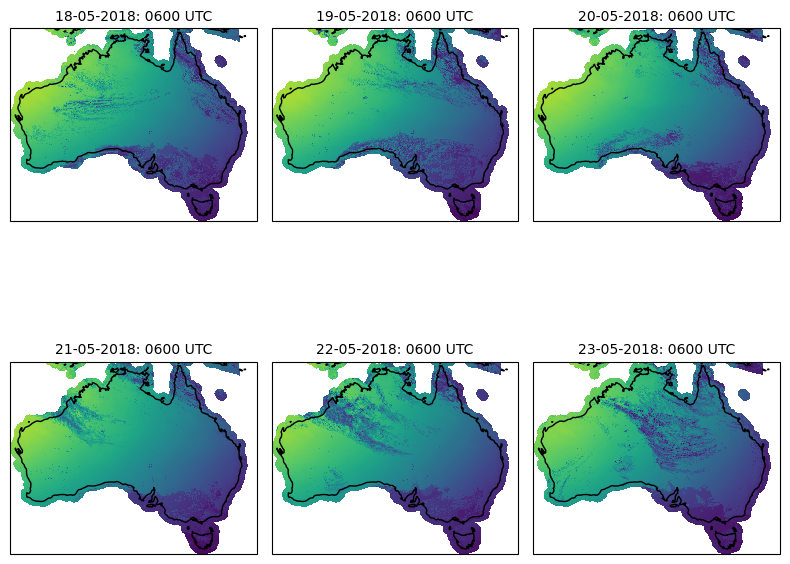

In [5]:
# Base parameters
start_date = datetime(2018, 5, 18, 6)  # Starting datetime
num_days = 6  # Number of days to plot
maxv = 800  # Maximum value for irradiance color scale

# Set up the 2x3 subplot
fig, axes = plt.subplots(2, 3, figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})

for i in range(num_days):
    # Compute the date for the current plot
    current_date = start_date + timedelta(days=i)
    datein = current_date.strftime('%Y%m%d%H%M')
    
    # Construct file path and read data
    if start_date >= datetime(2019, 4, 1, 0):
        folder = 'latest'
    else:
        folder = 'v1.0'
    dirin = f'/g/data/rv74/satellite-products/arc/der/himawari-ahi/solar/p1s/{folder}/{current_date.year:04}/{current_date.month:02}/{current_date.day:02}/'
    filename = f'IDE00326.{datein}.nc'
    try:
        dataset = Dataset(dirin + filename)
    except FileNotFoundError:
        print(f"File not found: {dirin + filename}")
        continue
    
    latitudes = dataset.variables['latitude'][:]
    longitudes = dataset.variables['longitude'][:]
    irradiance = np.squeeze(dataset.variables['surface_global_irradiance'][:,:,:])
    
    # Select the current axis
    ax = axes[i // 3, i % 3]
    
    # Plot the data
    title = current_date.strftime('%d-%m-%Y: %H%M UTC')
    mesh = ax.pcolormesh(longitudes, latitudes, irradiance, cmap='viridis', vmin=0, vmax=maxv, transform=ccrs.PlateCarree())
    ax.set_title(f'{title}', fontsize=10)
    ax.coastlines()
    
    # Add colorbar
    # cbar = fig.colorbar(mesh, ax=ax, orientation='horizontal', shrink=0.7, pad=0.05)
    # cbar.ax.tick_params(labelsize=8)  # Set font size for colorbar ticks
    # cbar.set_label('Value', fontsize=8)
    
# Adjust layout and show
plt.tight_layout()
plt.show()